I chose to use the "Electric Vehicle Population Data" dataset.

I found the dataset on catalog.data.gov, specifically at the URL: https://catalog.data.gov/dataset/electric-vehicle-population-data

This dataset shows the Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) that are currently registered through Washington State Department of Licensing (DOL). (Quoted from data.WA.gov)

Anyone can obtain this same dataset at the previously stated URL, or alternatively straight from its actual source, at: https://data.wa.gov/Transportation/Electric-Vehicle-Population-Data/f6w7-q2d2 or in the same folder as this notebook, under the name, "Electric_Vehicle_Population_Data.csv"

The licensing information for the dataset is not explicitly stated, but it is categorized as being for public access and use. However, like most government data, I would assume that the data in this dataset is in the public domain. This means that anyone is allowed to view it, create visualizations of it, and even republish accurate representations of it.

The dataset is about 25MB and 109,027 rows by 17 columns, putting it well within GitHub's limit of 100MB. This means I have no reason to host the data myself and I will most likely upload it directly to GitHub.

# Now on to the actual data:

In [1]:
#Imports:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,1N4BZ0CP9G,Snohomish,Arlington,WA,98223,2016,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,39.0,238236288,NaN,PUGET SOUND ENERGY INC,53061052701
1,1N4AZ0CP5G,King,Seattle,WA,98118,2016,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,37.0,182735367,NaN,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033011102
2,1N4BZ1CP7K,Thurston,Olympia,WA,98502,2019,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,150,0,22.0,142814556,POINT (-102.71236 22.94812),NaN,53067012002
3,5YJ3E1EBXK,Frederick,Frederick,MD,21704,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,NaN,114252337,POINT (-77.368491 39.354463),NaN,24021752205
4,5YJ3E1EAXL,King,Bellevue,WA,98008,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266,0,48.0,2075510,NaN,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033023100


# Columns and their descriptions:
*VIN (1-10)*: The 1st 10 characters of each vehicle's Vehicle Identification Number (VIN).

*County*: The county in which the registered owner resides.

*City*: The city in which the registered owner resides.

*State*: The state in which the registered owner resides.

*Postal Code*: The 5 digit zip code in which the registered owner resides.

*Model Year*: The model year of the vehicle, determined by decoding the VIN.

*Make*: The manufacturer of the vehicle, determined by decoding the VIN.

*Model*: The model of the vehicle, determined by decoding the VIN.

*Electric Vehicle Type*: This distinguishes the vehicle as all electric or a plug-in hybrid.

*Clean Alternative Fuel Vehicle (CAFV) Eligibility*: This categorizes the vehicle as Clean Alternative Fuel Vehicles (CAFVs) based on the fuel requirement and electric-only range requirement in House Bill 2042 as passed in the 2019 legislative session.

*Electric Range*: Describes how far a vehicle can travel purely on its electric charge.

*Base MSRP*: This is the lowest Manufacturer's Suggested Retail Price (MSRP) for any trim level of the model in question.

*Legislative District*: The specific section of Washington State that the vehicle's owner resides in, as represented in the state legislature.

*DOL Vehicle ID*: Unique number assigned to each vehicle by Department of Licensing for identification purposes.

*Vehicle Location*: The center of the ZIP Code for the registered vehicle.

*Electric Utility*: This is the electric power retail service territories serving the address of the registered vehicle. All ownership types for areas in Washington are included: federal, investor owned, municipal, political subdivision, and cooperative. If the address for the registered vehicle falls into an area with overlapping electric power retail service territories then a single pipe | delimits utilities of the same TYPE and a double pipe || delimits utilities of different types. We combined vehicle address and Homeland Infrastructure Foundation Level Database (HIFLD) (https://gii.dhs.gov/HIFLD) Retail_Service_Territories feature layer using a geographic information system to assign values for this field. Blanks occur for vehicles with addresses outside of Washington or for addresses falling into areas in Washington not containing a mapped electric power retail service territory in the source data.

*2020 Census Tract*: The census tract identifier is a combination of the state, county, and census tract codes as assigned by the United States Census Bureau in the 2020 census, also known as Geographic Identifier (GEOID). More information can be found here: https://www.census.gov/programs-surveys/geography/about/glossary.html#par_textimage_13 https://www.census.gov/programs-surveys/geography/guidance/geo-identifiers.html

**Column Types:**

In [3]:
df.dtypes

VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                            int64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                         int64
Base MSRP                                              int64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract       

**Main Plot:**

In [4]:
cities_clean_energy = df[df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Clean Alternative Fuel Vehicle Eligible'].groupby('City').count()['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].sort_values(ascending=False)
cities_clean_energy = cities_clean_energy.nlargest(20)
cities_clean_energy

City
Seattle          10744
Bellevue          3056
Redmond           2223
Vancouver         2031
Kirkland          1894
Sammamish         1687
Bothell           1654
Olympia           1474
Renton            1402
Tacoma            1212
Bellingham        1136
Issaquah           939
Woodinville        936
Mercer Island      904
Spokane            866
Everett            785
Kent               732
Snohomish          714
Shoreline          707
Edmonds            698
Name: Clean Alternative Fuel Vehicle (CAFV) Eligibility, dtype: int64

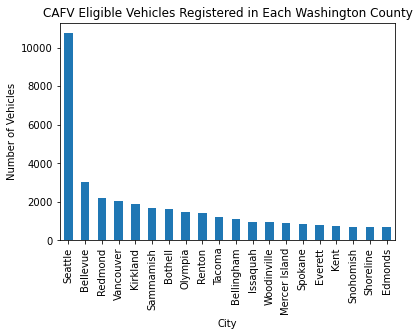

In [5]:
cities_clean_energy.plot.bar()

plt.title('CAFV Eligible Vehicles Registered in Each Washington County')
plt.ylabel('Number of Vehicles')

plt.show()

I made this plot to display the top 20 cities in Washington decided by the total amount of Clean Alternative Fuel Vehicle (CAFV) Eligible electric vehicles in the city. I found this interesting because it somewhat hints at what cities are making the most progress towards transferring their vehicle use over from gas powered cars to cars powered by clean energy.

**Data Exploration:**

In [6]:
temp = df.groupby('Make').mean()['Electric Range'].sort_values(ascending=False)
temp

Make
JAGUAR                  212.130841
TESLA                   128.745004
CHEVROLET               114.165011
WHEEGO ELECTRIC CARS    100.000000
TH!NK                   100.000000
NISSAN                   90.263781
FIAT                     85.649635
DODGE                    80.000000
AUDI                     64.963062
SMART                    62.307971
KIA                      60.192071
AZURE DYNAMICS           56.000000
PORSCHE                  55.686324
VOLKSWAGEN               48.729647
BMW                      47.362438
HYUNDAI                  46.699130
HONDA                    46.615287
POLESTAR                 45.202000
CADILLAC                 35.682243
FISKER                   33.000000
CHRYSLER                 32.367914
MINI                     28.405724
MITSUBISHI               26.683135
MERCEDES-BENZ            26.009592
TOYOTA                   25.777984
LINCOLN                  22.712230
JEEP                     22.688385
LAND ROVER               19.000000
BENTLEY        

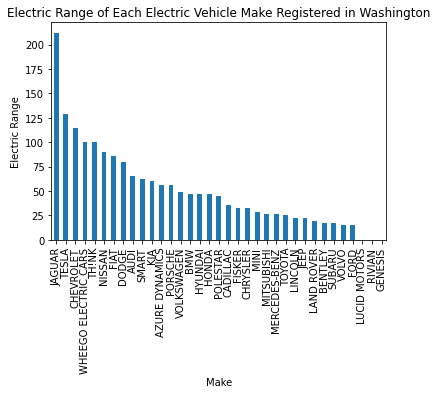

In [7]:
temp.plot.bar(x='Make', y='Electric Range')
plt.title('Electric Range of Each Electric Vehicle Make Registered in Washington')
plt.ylabel('Electric Range')
plt.show()

This is a graph displaying the average electric range of each make of electric vehicle registered in Washington. While this doesn't say much about Washington or the state of electric vehicles in Washington, it does show which makes of electric cars have the highest average electric range.

In [8]:
temp = df.groupby('City')['Electric Vehicle Type'].value_counts()
temp
#sns.barplot(data=temp, x='City', y=temp.iloc[:,2], hue='Electric Vehicle Type')

City         Electric Vehicle Type                 
Aberdeen     Battery Electric Vehicle (BEV)             60
             Plug-in Hybrid Electric Vehicle (PHEV)     39
Acme         Battery Electric Vehicle (BEV)              3
             Plug-in Hybrid Electric Vehicle (PHEV)      2
Adairsville  Plug-in Hybrid Electric Vehicle (PHEV)      1
                                                      ... 
Yelm         Battery Electric Vehicle (BEV)            132
             Plug-in Hybrid Electric Vehicle (PHEV)     62
Yermo        Battery Electric Vehicle (BEV)              1
Zillah       Battery Electric Vehicle (BEV)             16
             Plug-in Hybrid Electric Vehicle (PHEV)      6
Name: Electric Vehicle Type, Length: 1021, dtype: int64

I was trying to graph the amount of PHEV and BEV vehicles in each city using a barplot with two bars for each city but it didn't work. This would have been interesting simply to see which type of vehicle seems the most prevalent and if the ratio between the two changed significantly between cities.

In [9]:
temp = df.groupby('Model Year').count().reset_index()[['Model Year', 'VIN (1-10)']]
temp = temp.rename(columns={'VIN (1-10)': 'num_of_vehicles'})
temp

,Model Year,num_of_vehicles
0,1993,1
1,1997,1
2,1998,1
3,1999,3
4,2000,10
5,2002,2
6,2008,26
7,2010,26
8,2011,849
9,2012,1713


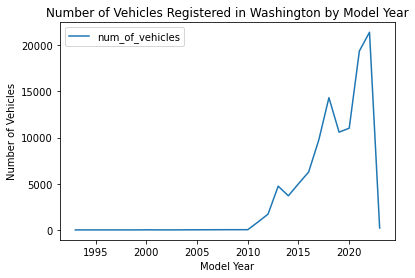

In [10]:
temp.plot.line(x='Model Year', y='num_of_vehicles')

plt.ylabel('Number of Vehicles')
plt.title('Number of Vehicles Registered in Washington by Model Year')

plt.show()

This is the total number of vehicles from each Model Year registered in Washington. I found this interesting to see a simple visualization of what model years were the most popular and when a significant number of them began appearing. An interesting find that I did not expect is that a single electric vehicle was registered in each of the model years: 1993, 1997, and 1998, which is long before when I had thought electric vehicles were first made.

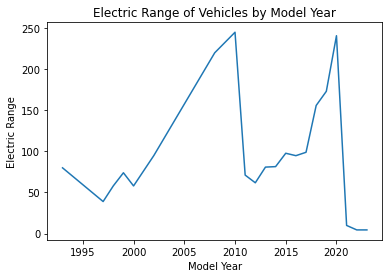

In [11]:
temp = df.groupby('Model Year').mean()['Electric Range']

plt.ylabel('Electric Range')
plt.title('Electric Range of Vehicles by Model Year')

temp.plot.line()
plt.show()

This is a simple line plot displaying the average electric range of electric vehicles registered in Washington from each model year in the years 1993-2023. I think it is interesting to visualize because although the years go on, it does not mean we have linearly increased the electric range of our vehicles, which is clearly demonstrated by this graph.

In [12]:
temp = df.groupby('City')['Make'].value_counts().unstack().idxmax(axis=1)
temp

City
Aberdeen          TESLA
Acme               FORD
Adairsville         BMW
Addy                BMW
Airway Heights    TESLA
                  ...  
Yakima            TESLA
Yarrow Point      TESLA
Yelm              TESLA
Yermo             TESLA
Zillah            TESLA
Length: 638, dtype: object

Although a visualization wouldn't be useful here, this is a list of which make of electric vehicle is most common in each city. I think this is interesting just to see what is overall the most common vehicle make and if many of the cities prefer a make other than the most popular ones.

**Group Names:**

I am just a group of one, so: Ashton Anaya